In [1]:
# 1: Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 2: Loading the Dataset

data = pd.read_excel('employee_rawdata.xlsx')
print(data)

              Name            Team  Number Position  Age               Height  \
0    Avery Bradley  Boston Celtics       0       PG   25  2023-02-06 00:00:00   
1      Jae Crowder  Boston Celtics      99       SF   25  2023-06-06 00:00:00   
2     John Holland  Boston Celtics      30       SG   27  2023-05-06 00:00:00   
3      R.J. Hunter  Boston Celtics      28       SG   22  2023-05-06 00:00:00   
4    Jonas Jerebko  Boston Celtics       8       PF   29  2023-10-06 00:00:00   
..             ...             ...     ...      ...  ...                  ...   
453   Shelvin Mack       Utah Jazz       8       PG   26  2023-03-06 00:00:00   
454      Raul Neto       Utah Jazz      25       PG   24  2023-01-06 00:00:00   
455   Tibor Pleiss       Utah Jazz      21        C   26  2023-03-07 00:00:00   
456    Jeff Withey       Utah Jazz      24        C   26                  7-0   
457       Priyanka       Utah Jazz      34        C   25  2023-03-07 00:00:00   

     Weight            Coll

In [6]:
#3: Preprocessing
#Replace 'Height' column values with random numbers between 150 and 180

data['Height'] = np.random.randint(150, 181, size=len(data))
print(data)


              Name            Team  Number Position  Age  Height  Weight  \
0    Avery Bradley  Boston Celtics       0       PG   25     151     180   
1      Jae Crowder  Boston Celtics      99       SF   25     171     235   
2     John Holland  Boston Celtics      30       SG   27     159     205   
3      R.J. Hunter  Boston Celtics      28       SG   22     165     185   
4    Jonas Jerebko  Boston Celtics       8       PF   29     153     231   
..             ...             ...     ...      ...  ...     ...     ...   
453   Shelvin Mack       Utah Jazz       8       PG   26     163     203   
454      Raul Neto       Utah Jazz      25       PG   24     171     179   
455   Tibor Pleiss       Utah Jazz      21        C   26     158     256   
456    Jeff Withey       Utah Jazz      24        C   26     160     231   
457       Priyanka       Utah Jazz      34        C   25     165     231   

               College     Salary  
0                Texas  7730337.0  
1            Ma

In [17]:
#4: Ensuring data consistency and integrity
data['College'] = data['College'].fillna('Unknown')
data.drop_duplicates(inplace=True)
data.fillna(0, inplace=True)
print(data)

              Name            Team  Number Position  Age  Height  Weight  \
0    Avery Bradley  Boston Celtics       0       PG   25     151     180   
1      Jae Crowder  Boston Celtics      99       SF   25     171     235   
2     John Holland  Boston Celtics      30       SG   27     159     205   
3      R.J. Hunter  Boston Celtics      28       SG   22     165     185   
4    Jonas Jerebko  Boston Celtics       8       PF   29     153     231   
..             ...             ...     ...      ...  ...     ...     ...   
453   Shelvin Mack       Utah Jazz       8       PG   26     163     203   
454      Raul Neto       Utah Jazz      25       PG   24     171     179   
455   Tibor Pleiss       Utah Jazz      21        C   26     158     256   
456    Jeff Withey       Utah Jazz      24        C   26     160     231   
457       Priyanka       Utah Jazz      34        C   25     165     231   

               College     Salary  
0                Texas  7730337.0  
1            Ma

In [18]:
# Check columns with missing values
missing_columns = data.isnull().sum()
print(missing_columns)

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64


In [21]:
# Analysis Tasks

# 1. Distribution of employees across teams 

# Calculate the distribution of employees by team
team_distribution = data['Team'].value_counts()

# Calculate percentage split
team_percentage = (team_distribution / len(data)) * 100

# Display the results
print("Distribution of employees across teams:")
print(team_distribution)

print("\nPercentage split of employees by team:")
print(team_percentage)


Distribution of employees across teams:
Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Percentage split of employees by team:
Team
New Orleans Pe

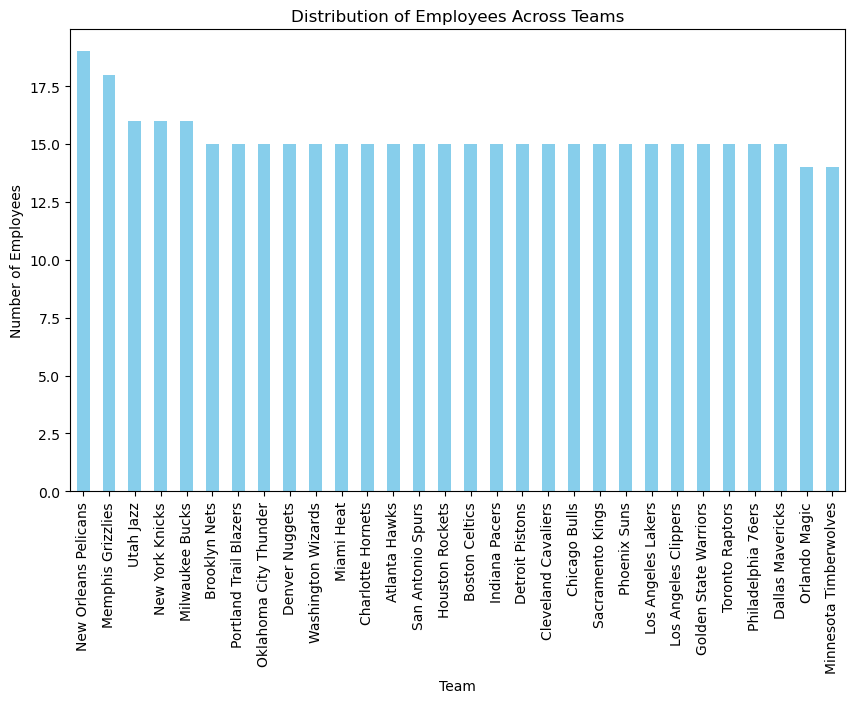

In [29]:
#Graphical Representation of team distribution
# Plot a bar chart for team distribution
team_distribution.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Distribution of Employees Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90)
plt.show()


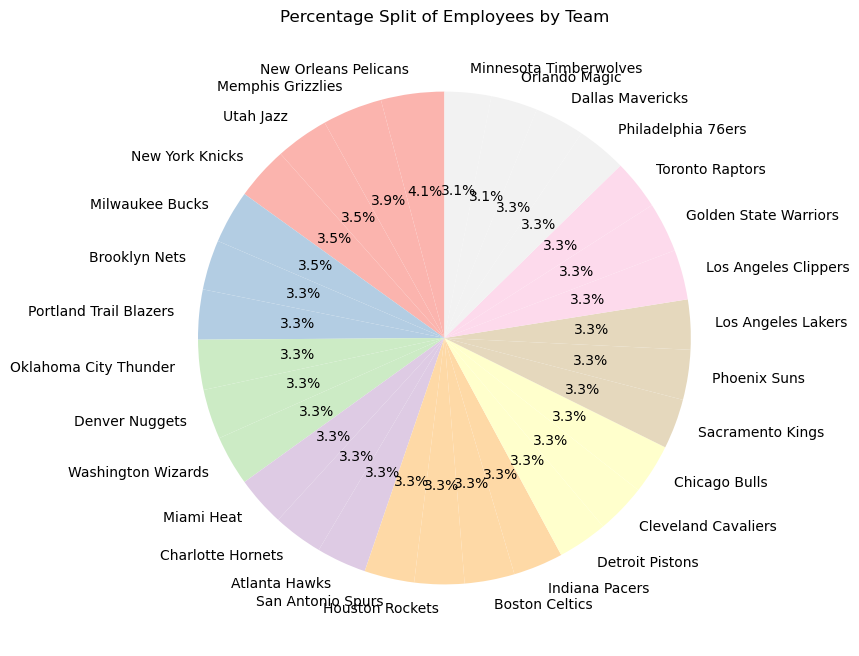

In [28]:
# Plot a pie chart for percentage split
team_percentage.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colormap='Pastel1')
plt.title('Percentage Split of Employees by Team')
plt.ylabel('')  # Hides the y-label for a cleaner look
plt.show()


In [30]:
#2. Segregate employees based on their positions
position_distribution = data['Position'].value_counts()

# Display the distribution
print("Employee count by position:")
print(position_distribution)


Employee count by position:
Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


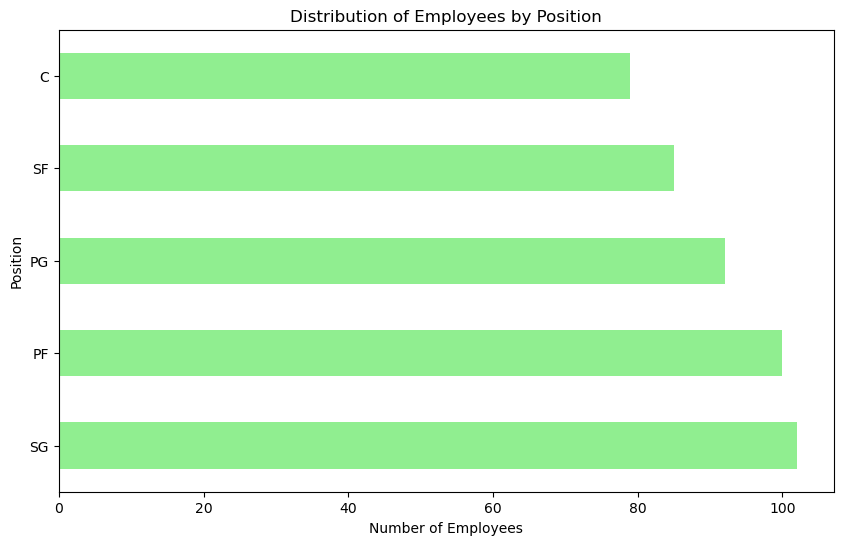

In [33]:
# Visualize the distribution using a bar chart
position_distribution.plot(kind='barh', color='lightgreen', figsize=(10, 6))
plt.title('Distribution of Employees by Position')
plt.xlabel('Number of Employees')
plt.ylabel('Position')
plt.show()


In [34]:
#3. Predominant Age Group

# Define age bins and categorize employees into age groups
age_bins = [20, 30, 40, 50]
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=['20-30', '30-40', '40-50'])

# Count the number of employees in each age group
age_group_distribution = data['Age Group'].value_counts()

# Display the distribution
print("Employee count by age group:")
print(age_group_distribution)

Employee count by age group:
Age Group
20-30    346
30-40     91
40-50      0
Name: count, dtype: int64


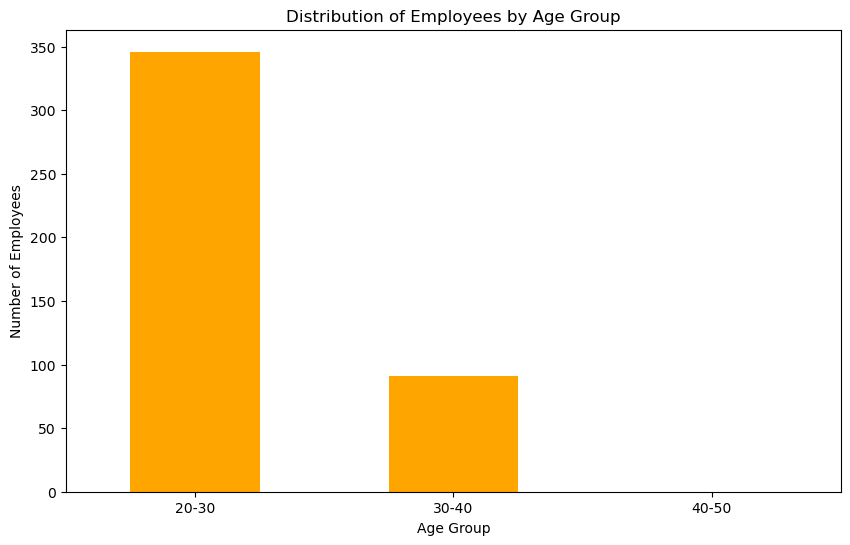

In [37]:
# Visualization using Bar chart for age group distribution
age_group_distribution.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Distribution of Employees by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.show()


In [49]:
#4: Group by Team and Position, then calculate the total salary expenditure
team_position_salary = data.groupby(['Team', 'Position'])['Salary'].sum()

# Find the team-position combination with the highest salary expenditure
highest_salary_combination = team_position_salary.idxmax()  # Retrieves the team and position
highest_salary_amount = team_position_salary.max()  # Retrieves the maximum salary expenditure

print("Team and Position with the highest salary expenditure:", highest_salary_combination)
print("Highest Salary Expenditure Amount:", highest_salary_amount)


Team and Position with the highest salary expenditure: ('Los Angeles Lakers', 'SF')
Highest Salary Expenditure Amount: 31866445.0


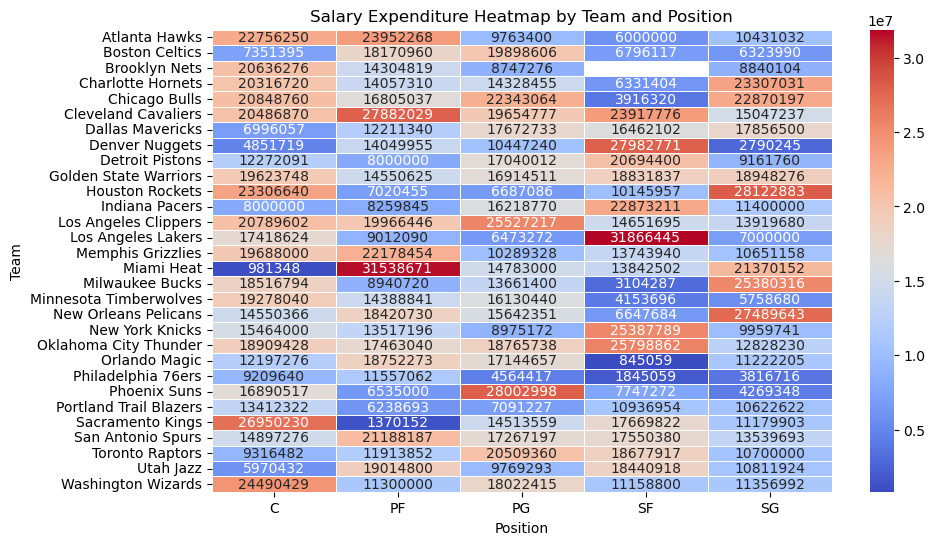

In [57]:
# Pivot the data for a heatmap
team_position_pivot = data.groupby(['Team', 'Position'])['Salary'].sum().unstack()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(team_position_pivot, annot=True, fmt=".0f", cmap='coolwarm', linewidths=0.5)
plt.title('Salary Expenditure Heatmap by Team and Position')
plt.xlabel('Position')
plt.ylabel('Team')
plt.show()


In [51]:
#5: Calculate correlation between Age and Salary
correlation = data[['Age', 'Salary']].corr()

print("Correlation between Age and Salary:")
print(correlation)


Correlation between Age and Salary:
            Age   Salary
Age     1.00000  0.20501
Salary  0.20501  1.00000


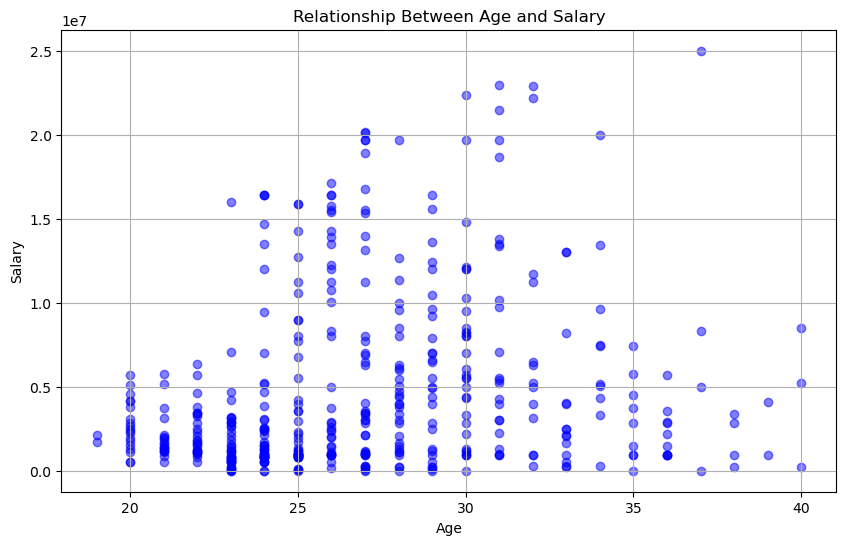

In [56]:
# Scatter plot of Age vs Salary
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Salary'], color='blue', alpha=0.5)
plt.title('Relationship Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


In [53]:
# Summary of Insights
print("Key Insights:")
print("- Team distribution highlights the balance of employees across departments.")
print("- Certain positions dominate employee numbers within the company.")
print("- Predominant age groups show a concentration in specific ranges.")
print("- Highest salary expenditures are associated with particular teams and positions.")
print("- Correlation analysis reveals the relationship between age and salary.")


Key Insights:
- Team distribution highlights the balance of employees across departments.
- Certain positions dominate employee numbers within the company.
- Predominant age groups show a concentration in specific ranges.
- Highest salary expenditures are associated with particular teams and positions.
- Correlation analysis reveals the relationship between age and salary.


In [55]:
# Save the modified dataset to a new file
data.to_excel('processed_project.xlsx', index=False)